# Setup

In [ ]:
# installation of required libraries
!pip install biopandas ifeatureomegacli Biopython rdkit

In [ ]:
!rm -rf /content/*

# Data exploration

## 1. Load the protein data

In [ ]:
from biopandas.pdb import PandasPdb
import pandas as pd

Note: Why is `biopandas` useful for protein analysis?

If you work with PDB files and want to analyze protein structures efficiently in Python, biopandas makes it easier by converting structural data into Pandas DataFrames.
Key Benefits for a Computational Protein Workshop

- **Easy Data Handling**: Instead of looping through PDB files manually, you can use biopandas to extract atomic coordinates, residue information, and chain details into a structured DataFrame.
- **Fast Filtering**: Need only backbone atoms, a specific chain, or only hydrophobic residues? Use simple pandas filtering instead of complex parsing.
- **Compatible with ML & Visualization**: Since biopandas works with DataFrames, it’s easier to integrate protein structural data into machine learning pipelines or use matplotlib for visualization.
- **No Complex Parsing**: Unlike `Bio.PDB` (which requires object-oriented access), biopandas lets you query PDB data like a spreadsheet, making it more beginner-friendly.


In [ ]:
PDB_FILE_LOCATION = 'https://github.com/enveda/enzyme-ml/raw/refs/heads/main/workshop_data/cotb2_ml_data/cotb2_pp_mg.pdb'
!wget $PDB_FILE_LOCATION -O /content/cotb2_pp_mg.pdb

--2025-03-11 16:09:50--  https://github.com/enveda/enzyme-ml/raw/refs/heads/main/workshop_data/cotb2_ml_data/cotb2_pp_mg.pdb
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/enveda/enzyme-ml/refs/heads/main/workshop_data/cotb2_ml_data/cotb2_pp_mg.pdb [following]
--2025-03-11 16:09:50--  https://raw.githubusercontent.com/enveda/enzyme-ml/refs/heads/main/workshop_data/cotb2_ml_data/cotb2_pp_mg.pdb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 379404 (371K) [text/plain]
Saving to: ‘/content/cotb2_pp_mg.pdb’

/content/cotb2_pp_m 100%[===================>] 370.51K  --.-KB/s    in 0.04s   

2025-03-1

In [ ]:
!ls /content

cotb2_pp_mg.pdb


In [ ]:
pdb_file = PandasPdb().read_pdb('/content/cotb2_pp_mg.pdb')

In [ ]:
display(
    pdb_file.df["ATOM"].head(3),
    pdb_file.df["HETATM"].head(3)
)

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,MET,,,1,,...,-18.379,-5.699,-9.533,1.0,0.0,,PEP1,,NaN,2
1,ATOM,2,,HT1,,MET,,,1,,...,-18.233,-5.102,-10.372,1.0,0.0,,PEP1,,NaN,3
2,ATOM,3,,HT2,,MET,,,1,,...,-17.858,-6.592,-9.648,1.0,0.0,,PEP1,,NaN,4


,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx


### Excercise 🚧
Plot the distribution of amino acids.

### Answer

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: MatplotlibDeprecationWarning: savefig() got unexpected keyword ar

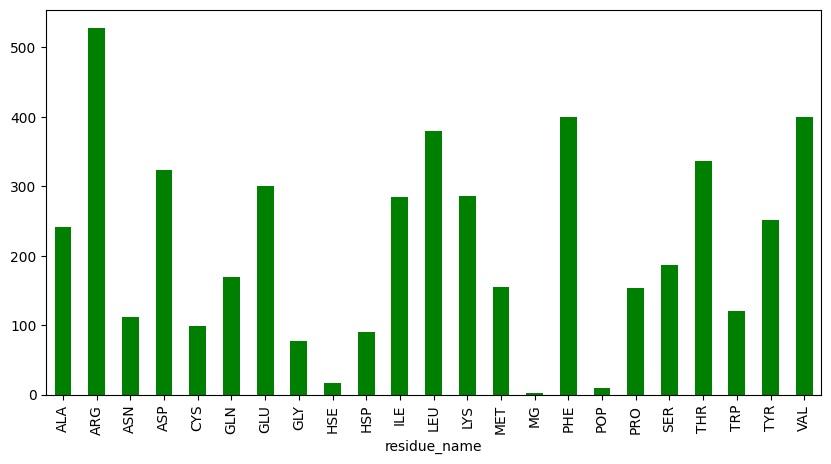

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

pdb_file.df["ATOM"].groupby("residue_name").size().plot(kind="bar", figsize=(10, 5), color='green')
_ = plt.xticks(rotation=90)

## 3. Extract the sequence from the protein file and write it into a fasta file

In [ ]:
# the mapping of 3 letter AA to 1 letter
aa_dict = {
    'ALA': 'A', 'CYS': 'C', 'ASP': 'D', 'GLU': 'E', 'PHE': 'F',
    'GLY': 'G', 'HIS': 'H', 'ILE': 'I', 'LYS': 'K', 'LEU': 'L',
    'MET': 'M', 'ASN': 'N', 'PRO': 'P', 'GLN': 'Q', 'ARG': 'R',
    'SER': 'S', 'THR': 'T', 'VAL': 'V', 'TRP': 'W', 'TYR': 'Y',
    'HSE': 'H', 'HSP': 'H', 'HSD': 'H', 'HIE': 'H', 'HID': 'H',
}

In [ ]:
grouped_amino_acids = pdb_file.df["ATOM"].groupby(["residue_number"]).first()
grouped_amino_acids.head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,insertion,blank_3,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
residue_number,,,,,,,,,,,,,,,,,,,,
1,ATOM,1,,N,,MET,,,,,-18.379,-5.699,-9.533,1.0,0.0,,PEP1,,NaN,2
2,ATOM,20,,N,,THR,,,,,-21.840,-4.420,-9.394,1.0,0.0,,PEP1,,NaN,21
3,ATOM,34,,N,,THR,,,,,-21.694,-2.311,-12.404,1.0,0.0,,PEP1,,NaN,35
4,ATOM,48,,N,,GLY,,,,,-21.695,-1.638,-15.612,1.0,0.0,,PEP1,,NaN,49
5,ATOM,55,,N,,LEU,,,,,-20.546,1.834,-15.993,1.0,0.0,,PEP1,,NaN,56


In [ ]:
sequence = "".join(grouped_amino_acids['residue_name'].map(aa_dict))
display(sequence)

TypeError: sequence item 308: expected str instance, float found

---

### Excercise 🚧

Clearly we have something in the original protein that is preventing us from making a sequence. Can you figure out what it could be?

### Answer 🏗

there are Mg and Pop (lipids) in the pandas dataframe. If you do

```python
set(aa_dict.keys()) - set(grouped_amino_acids["residue_name"])
```
you should see
```python
['MG', 'POP']
```

indicating that you must get rid of these somehow. One easy way is to simply do
```python
sequence = "".join(grouped_amino_acids['residue_name'].map(aa_dict).dropna())
```

In [ ]:
sequence = "".join(grouped_amino_acids['residue_name'].map(aa_dict).dropna())
display(sequence)

'MTTGLSTAGAQDIGRSSVRPYLEECTRRFQEMFDRHVVTRPTKVELTDAELREVIDDCNAAVAPLGKTVSDERWISYVGVVLWSQSPRHIKDMEAFKAVCVLNCVTFVWDDMDPALHDFGLFLPQLRKICEKYYGPEDAEVAYEAARAFVTSDHMFRDSPIKAALCTTSPEQYFRFRVTDIGVDFWMKMSYPIYRHPEFTEHAKTSLAARMTTRGLTIVNDFYSYDREVSLGQITNCFRLCDVSDETAFKEFFQARLDDMIEDIECIKAFDQLTQDVFLDLIYGNFVWTTSNKRYKTAVNDVNSRIQA'

---

In [ ]:
# how to write a fasta file

fasta_location = "cotb2_mg.fasta"
with open(fasta_location, "w") as f:
    f.write(f">cotb2_mg\n{sequence}")

# Alternative way to generate a sequence

In [ ]:
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.PDBExceptions import PDBConstructionWarning
from Bio.SeqUtils import seq1
import warnings

warnings.filterwarnings("ignore", category=PDBConstructionWarning)

PDB_FILE_LOCATION = "/content/cotb2_pp_mg.pdb"
parser = PDBParser(PERMISSIVE=True)
structure = parser.get_structure("cotb_mg", PDB_FILE_LOCATION)

chains = {}
for chain in structure.get_chains():
    # get the sequence of the chain
    seq = "".join(
        seq1(residue.resname)
        for residue in chain.get_residues()
    )
    chains[chain.id] = seq

In [ ]:
chains[' ']

'MTTGLSTAGAQDIGRSSVRPYLEECTRRFQEMFDRXVVTRPTKVELTDAELREVIDDCNAAVAPLGKTVSDERWISYVGVVLWSQSPRXIKDMEAFKAVCVLNCVTFVWDDMDPALXDFGLFLPQLRKICEKYYGPEDAEVAYEAARAFVTSDXMFRDSPIKAALCTTSPEQYFRFRVTDIGVDFWMKMSYPIYRXPEFTEXAKTSLAARMTTRGLTIVNDFYSYDREVSLGQITNCFRLCDVSDETAFKEFFQARLDDMIEDIECIKAFDQLTQDVFLDLIYGNFVWTTSNKRYKTAVNDVNSRIQAX'

#### Exercise 🚧
- Examine the sequences and figure out what is different between them and why.
- Can you get them to match each other?

### Answer 🏗

In [ ]:
set(chains[" "]) - set(sequence)

{'X'}

In [ ]:
for chain in structure.get_chains():
  for residue in chain.get_residues():
    if seq1(residue.resname) == "X":
      print(residue)

<Residue HSP het=  resseq=36 icode= >
<Residue HSP het=  resseq=89 icode= >
<Residue HSP het=  resseq=117 icode= >
<Residue HSE het=  resseq=154 icode= >
<Residue HSP het=  resseq=196 icode= >
<Residue HSP het=  resseq=202 icode= >
<Residue POP het=  resseq=309 icode= >


In [ ]:
chains = {}
for chain in structure.get_chains():
  seq = "".join(
      seq1(residue.resname)
      for residue in chain.get_residues()
      if seq1(residue.resname) != "X"
  )
  chains[chain.id] = seq

In [ ]:
set(chains[' ']) - set(sequence), set(sequence) - set(chains[' '])

(set(), {'H'})

**sometimes you can't lol**

### exercise 🚧  Find the amino acid composition (AAC)

In [ ]:
import warnings
from matplotlib.cbook import MatplotlibDeprecationWarning

warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)

,aa,frequency
0,ASP,0.0865
1,VAL,0.0801
2,ALA,0.0769
3,THR,0.0769
4,ARG,0.0705


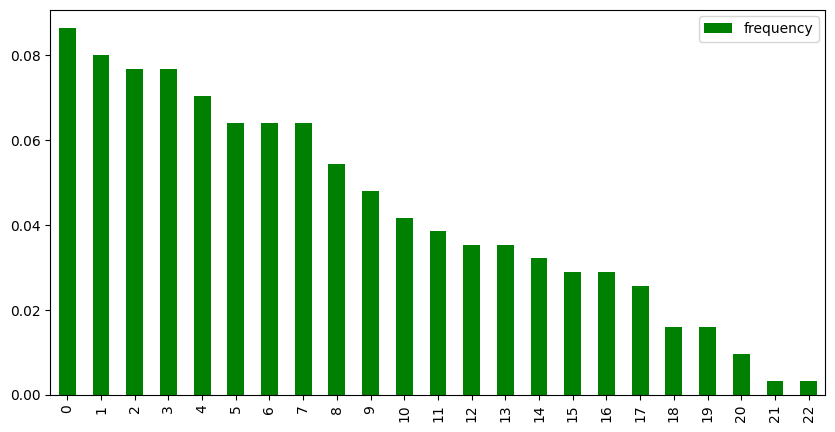

In [ ]:
# get raw counts
aac = pdb_file.df["ATOM"].groupby(["residue_number"]).first().residue_name.value_counts().to_dict()

# normalize to length of sequence
aac = {k:round(v/sum(aac.values()),4) for k,v in aac.items()}

counts = pd.DataFrame(aac.items(), columns = ["aa", "frequency"]).sort_values(by = "frequency", ascending = False)
display(counts.head())

# plot it
counts.plot(kind = "bar", figsize = (10,5), color = "green")
_ = plt.xticks(rotation = 90)

### exercise 🚧  Find Dipeptide composition (DC)

In [ ]:
from collections import Counter

# Generate dipeptides (two consecutive amino acids)
dipeptides = [sequence[i:i+2] for i in range(len(sequence)-1)]

# Count dipeptide occurrences
dipeptide_counts = Counter(dipeptides)

# Normalize to get relative frequencies
total_dipeptides = sum(dipeptide_counts.values())
dipeptide_freq = {dp: count / total_dipeptides for dp, count in dipeptide_counts.items()}

pd.DataFrame(dipeptide_freq.items(), columns = ["dipeptide", "frequency"]).sort_values(by = "frequency", ascending = False)

,dipeptide,frequency
128,TS,0.013029
131,FR,0.013029
89,AF,0.013029
1,TT,0.013029
37,VT,0.013029
...,...,...
78,WS,0.003257
77,LW,0.003257
74,VG,0.003257
73,YV,0.003257


# Protein Feature extraction

**Other packages you could use to featurize proteins:**

1. [propy](https://github.com/MartinThoma/propy3):

- Computes AAC, DC, Pseudo-AAC
- good for classical ML features

2. [biovec](https://github.com/kyu999/biovec)
-	Converts protein sequences into word embeddings (like Word2Vec).
-	Trains on k-mers from protein sequences.
-	Useful for deep learning models

3. [fair-esm](https://github.com/facebookresearch/esm)

- evolutionary scale modeling
- Extracts deep learning embeddings for proteins.
- Uses pre-trained transformers
- Great for deep learning tasks

In [ ]:
import iFeatureOmegaCLI

protein_features = iFeatureOmegaCLI.iProtein(fasta_location)

In [ ]:
help(protein_features)

Help on iProtein in module iFeatureOmegaCLI.iFeatureOmegaCLI object:

class iProtein(Sequence)
 |  iProtein(file)
 |  
 |  # Running examples:
 |  # import iFeatureOmegaCLI
 |  >>> import iFeatureOmegaCLI
 |  
 |  # create a instance
 |  >>> protein = iFeatureOmegaCLI.iProtein("./data_examples/peptide_sequences.txt")
 |  
 |  # display available feature descriptor methods
 |  >>> protein.display_feature_types()
 |  
 |  # import parameters for feature descriptors (optimal)
 |  >>> protein.import_parameters('parameters/Protein_parameters_setting.json')
 |  
 |  # calculate feature descriptors. Take "AAC" as an example.
 |  >>> protein.get_descriptor("AAC")
 |  
 |  # display the feature descriptors
 |  >>> print(protein.encodings)
 |  
 |  # save feature descriptors
 |  >>> protein.to_csv("AAC.csv", "index=False", header=False)
 |  
 |  Method resolution order:
 |      iProtein
 |      Sequence
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  CalculateContent(self, myDist

In [ ]:
protein_features.display_feature_types()


        ----- Available feature types ------        
        
        AAC                                                Amino acid composition
        EAAC                                               Enhanced amino acid composition
        CKSAAP type 1                                      Composition of k-spaced amino acid pairs type 1 - normalized
        CKSAAP type 2                                      Composition of k-spaced amino acid pairs type 2 - raw count
        DPC type 1                                         Dipeptide composition type 1 - normalized
        DPC type 2                                         Dipeptide composition type 2 - raw count
        TPC type 1                                         Tripeptide composition type 1 - normalized
        TPC type 2                                         Tripeptide composition type 1 - raw count
        CTDC                                               Composition
        CTDT                                      

In [ ]:
descriptor_blocks = ["AAC", "DistancePair", "BLOSUM62"]
protein_features = []
protein_features_names = []

PF = iFeatureOmegaCLI.iProtein(fasta_location)

for current_descriptor_block in descriptor_blocks:
    PF.get_descriptor(current_descriptor_block)
    current_features_table = PF.encodings.reset_index(drop=True)
    protein_features += current_features_table.values[0].tolist()
    protein_features_names += current_features_table.columns.tolist()

## Small molecules

,ligand,energy
0,lig_1_cotb2_100_100.pdb,-21.457340
1,lig_1_cotb2_100_10.pdb,-44.423028
2,lig_1_cotb2_100_11.pdb,-29.692781
3,lig_1_cotb2_100_12.pdb,-0.501767
4,lig_1_cotb2_100_13.pdb,-28.634483


(10000, 2)

<AxesSubplot:>

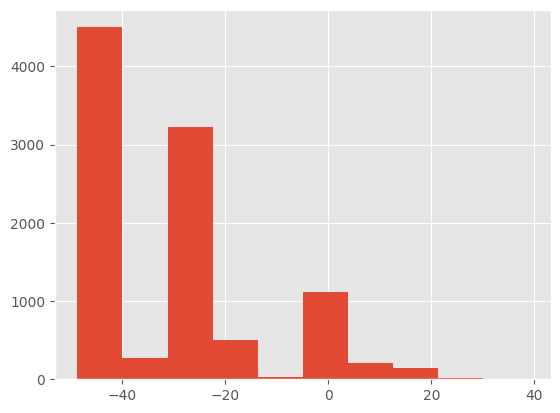

In [ ]:
%matplotlib inline

energies = 'https://github.com/enveda/enzyme-ml/raw/refs/heads/main/workshop_data/cotb2_ml_data/lig_1_energy.txt'
loaded_ligands = pd.read_csv(energies, header = None, sep=" ")
loaded_ligands.columns = ["ligand", "energy"]
display(loaded_ligands.head(5), loaded_ligands.shape)
loaded_ligands.energy.hist()

In [ ]:
import os

# get ligands
!wget "https://github.com/enveda/enzyme-ml/raw/refs/heads/main/workshop_data/cotb2_ml_data/lig_1_pdbs.tar" -O /content/lig_1_pdbs.tar
!mkdir -p ligands
!tar -xf /content/lig_1_pdbs.tar -C ligands

files = os.listdir("/content/ligands")
print(f"Number of files: {len(files)}")

--2025-03-11 16:19:26--  https://github.com/enveda/enzyme-ml/raw/refs/heads/main/workshop_data/cotb2_ml_data/lig_1_pdbs.tar
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/enveda/enzyme-ml/refs/heads/main/workshop_data/cotb2_ml_data/lig_1_pdbs.tar [following]
--2025-03-11 16:19:27--  https://raw.githubusercontent.com/enveda/enzyme-ml/refs/heads/main/workshop_data/cotb2_ml_data/lig_1_pdbs.tar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51210240 (49M) [application/octet-stream]
Saving to: ‘/content/lig_1_pdbs.tar’

/content/lig_1_pdbs 100%[===================>]  48.84M   173MB/s    in 0.3s    

In [ ]:
from rdkit import Chem
from tqdm import tqdm

for idx, row in tqdm(loaded_ligands.iterrows()):
  file_name = row["ligand"]
  file_path = "/content/ligands/" + file_name

  try:
    mol = Chem.MolFromPDBFile(file_path, removeHs=True)
    loaded_ligands.loc[idx, "mol"] = mol

    descriptors = Chem.Descriptors3D.CalcMolDescriptors3D(mol)
    for k,v in descriptors.items():
      loaded_ligands.loc[idx, k] = v
  except Exception as e:
    loaded_ligands.loc[idx, "mol"] = None
    continue

10000it [00:45, 220.91it/s]


In [ ]:
loaded_ligands = loaded_ligands.dropna(subset = ["mol"])
loaded_ligands["smiles"] = loaded_ligands["mol"].apply(lambda x: Chem.MolToSmiles(x))
loaded_ligands.head(5)

,ligand,energy,mol,PMI1,PMI2,PMI3,NPR1,NPR2,RadiusOfGyration,InertialShapeFactor,Eccentricity,Asphericity,SpherocityIndex,PBF,smiles
0,lig_1_cotb2_100_100.pdb,-21.457340,<rdkit.Chem.rdchem.Mol object at 0x7f43275a97e0>,858.038436,1583.425000,2184.329171,0.392816,0.724902,3.102941,0.000845,0.919617,0.247343,0.166761,0.576983,CC1CCCC(C)CCC2(C)CCC(C(C)C)C2CC1
1,lig_1_cotb2_100_10.pdb,-44.423028,<rdkit.Chem.rdchem.Mol object at 0x7f43275a98c0>,849.158235,1572.291482,2074.488795,0.409334,0.757918,3.059078,0.000893,0.912385,0.225252,0.231516,0.650322,CC1CCCC(C)CCC2(C)CCC(C(C)C)C2CC1
2,lig_1_cotb2_100_11.pdb,-29.692781,<rdkit.Chem.rdchem.Mol object at 0x7f43275a9930>,790.542596,1615.008980,2102.130286,0.376067,0.768273,3.063071,0.000972,0.926592,0.259586,0.201936,0.651273,CC1CCCC(C)CCC2(C)CCC(C(C)C)C2CC1
3,lig_1_cotb2_100_12.pdb,-0.501767,<rdkit.Chem.rdchem.Mol object at 0x7f43275a99a0>,882.532834,1438.458730,2037.900117,0.433060,0.705853,3.012094,0.000800,0.901365,0.210870,0.194837,0.590767,CC1CCCC(C)CCC2(C)CCC(C(C)C)C2CC1
4,lig_1_cotb2_100_13.pdb,-28.634483,<rdkit.Chem.rdchem.Mol object at 0x7f43275a9a10>,776.232018,1621.679340,2083.545226,0.372553,0.778327,3.054148,0.001003,0.928011,0.262621,0.210445,0.667377,CC1CCCC(C)CCC2(C)CCC(C(C)C)C2CC1


In [ ]:
loaded_ligands.smiles.value_counts()

,count
smiles,
CC1CCCC(C)CCC2(C)CCC(C(C)C)C2CC1,10000


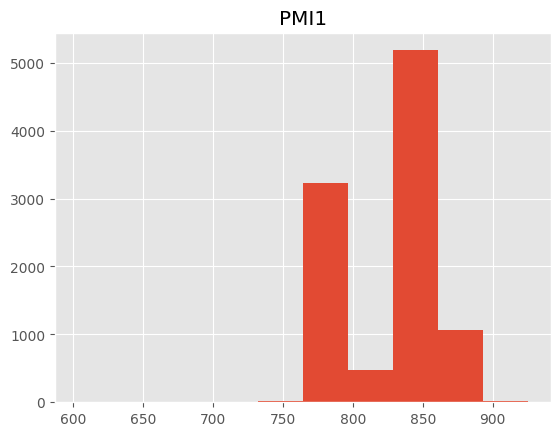

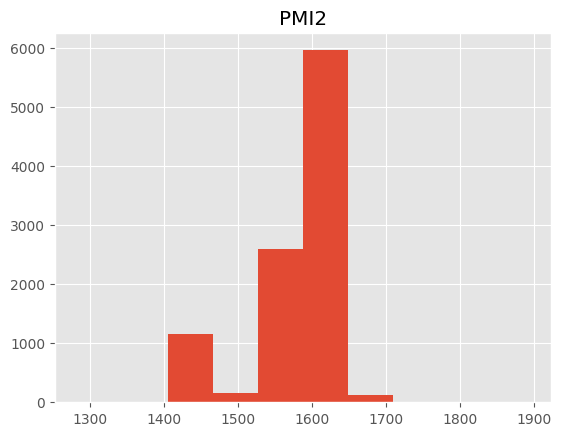

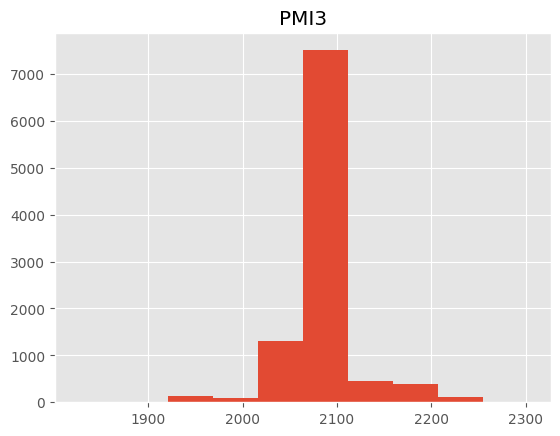

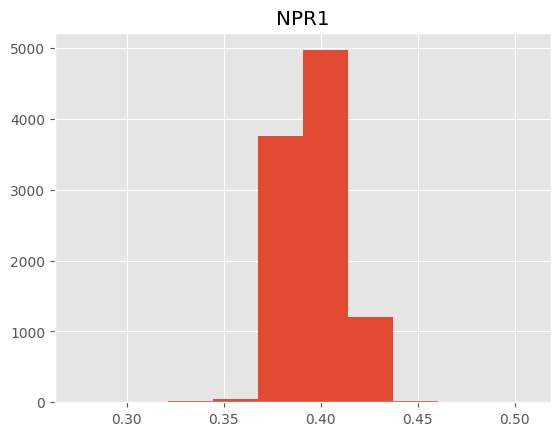

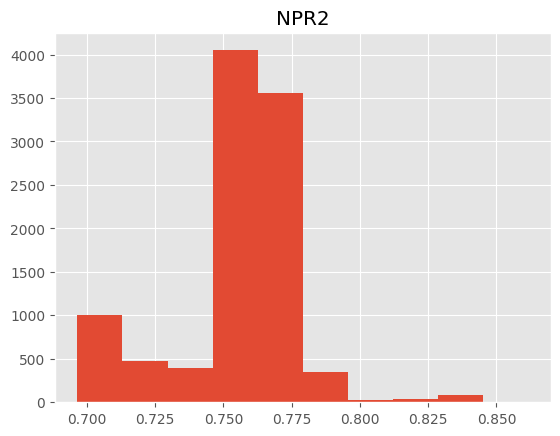

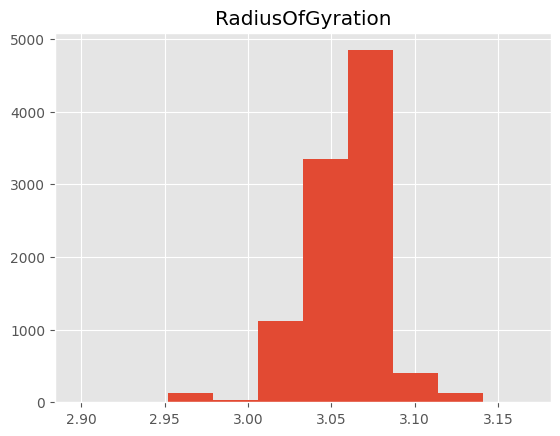

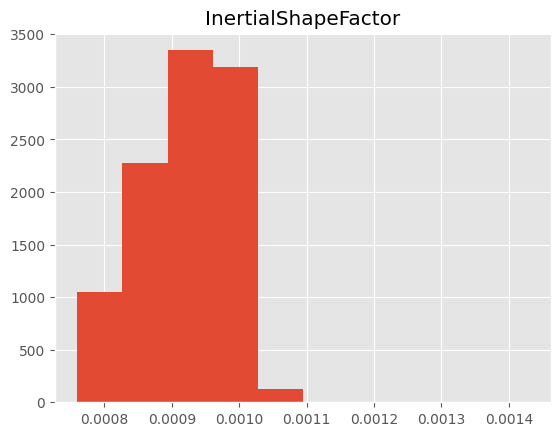

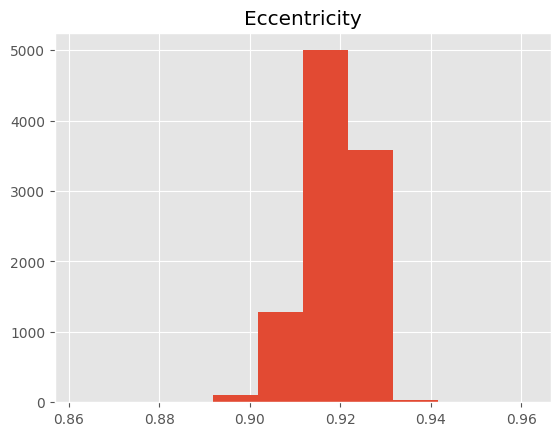

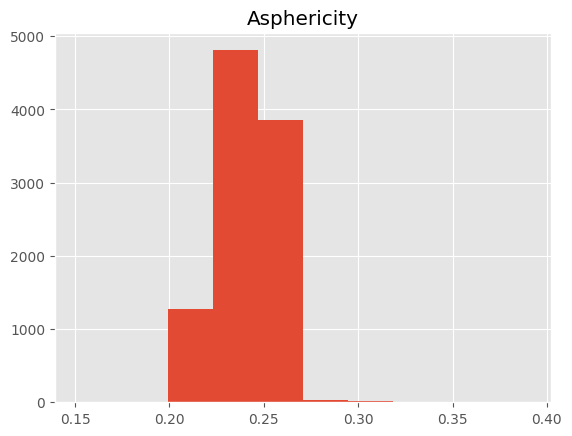

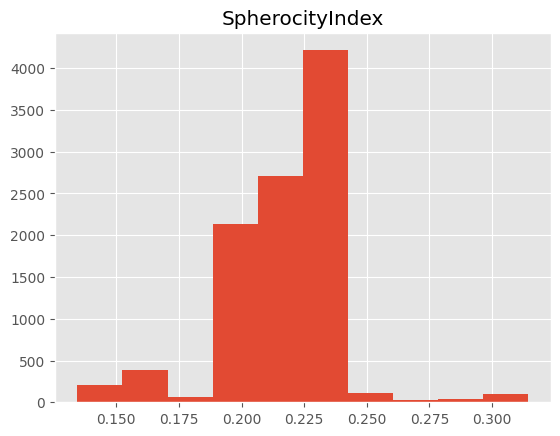

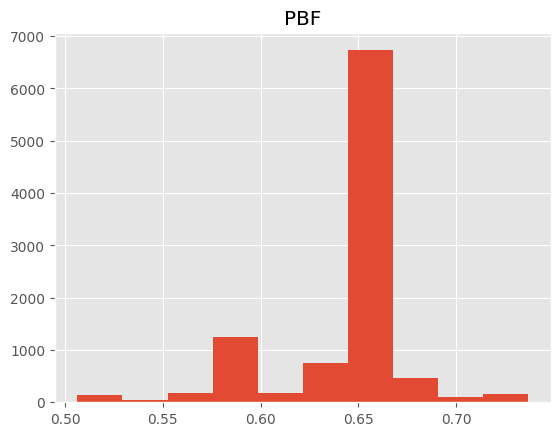

In [ ]:
%matplotlib inline

for col in descriptors.keys():
  loaded_ligands[col].hist()
  plt.title(col)
  plt.show()

In [ ]:
# Concatenate the list of dataframes into a single dataframe
ligand_features_names = list(descriptors.keys())
spatial_descriptors_df = loaded_ligands[descriptors.keys()].reset_index(drop=True)
spatial_descriptors_df

,PMI1,PMI2,PMI3,NPR1,NPR2,RadiusOfGyration,InertialShapeFactor,Eccentricity,Asphericity,SpherocityIndex,PBF
0,858.038436,1583.425000,2184.329171,0.392816,0.724902,3.102941,0.000845,0.919617,0.247343,0.166761,0.576983
1,849.158235,1572.291482,2074.488795,0.409334,0.757918,3.059078,0.000893,0.912385,0.225252,0.231516,0.650322
2,790.542596,1615.008980,2102.130286,0.376067,0.768273,3.063071,0.000972,0.926592,0.259586,0.201936,0.651273
3,882.532834,1438.458730,2037.900117,0.433060,0.705853,3.012094,0.000800,0.901365,0.210870,0.194837,0.590767
4,776.232018,1621.679340,2083.545226,0.372553,0.778327,3.054148,0.001003,0.928011,0.262621,0.210445,0.667377
...,...,...,...,...,...,...,...,...,...,...,...
9995,842.435504,1600.320935,2097.355534,0.401666,0.763018,3.074070,0.000906,0.915786,0.232504,0.228233,0.650097
9996,827.165645,1521.637655,2058.190976,0.401890,0.739308,3.028668,0.000894,0.915688,0.235367,0.197830,0.605651
9997,846.382638,1586.999714,2086.963428,0.405557,0.760435,3.067371,0.000898,0.914070,0.228792,0.229906,0.652647
9998,843.493740,1600.698589,2096.000717,0.402430,0.763692,3.074097,0.000905,0.915451,0.231642,0.230073,0.651947


## Grab labels

In [ ]:
import numpy as np

# Repeat the protein features on labelled ligands
protein_features_df = pd.DataFrame(
    np.repeat([protein_features], spatial_descriptors_df.shape[0], axis = 0),
    columns = protein_features_names
).reset_index(drop = True)
data_for_ML = pd.concat(
    [spatial_descriptors_df,
     protein_features_df],
    axis = 1
)
#data_for_ML.to_csv(MAIN_FOLDER + "data_for_ML.csv", index = False)
data_for_ML.head(5)

,PMI1,PMI2,PMI3,NPR1,NPR2,RadiusOfGyration,InertialShapeFactor,Eccentricity,Asphericity,SpherocityIndex,...,blosum62_6151,blosum62_6152,blosum62_6153,blosum62_6154,blosum62_6155,blosum62_6156,blosum62_6157,blosum62_6158,blosum62_6159,blosum62_6160
0,858.038436,1583.425000,2184.329171,0.392816,0.724902,3.102941,0.000845,0.919617,0.247343,0.166761,...,-1.0,-1.0,-1.0,-2.0,-1.0,1.0,0.0,-3.0,-2.0,0.0
1,849.158235,1572.291482,2074.488795,0.409334,0.757918,3.059078,0.000893,0.912385,0.225252,0.231516,...,-1.0,-1.0,-1.0,-2.0,-1.0,1.0,0.0,-3.0,-2.0,0.0
2,790.542596,1615.008980,2102.130286,0.376067,0.768273,3.063071,0.000972,0.926592,0.259586,0.201936,...,-1.0,-1.0,-1.0,-2.0,-1.0,1.0,0.0,-3.0,-2.0,0.0
3,882.532834,1438.458730,2037.900117,0.433060,0.705853,3.012094,0.000800,0.901365,0.210870,0.194837,...,-1.0,-1.0,-1.0,-2.0,-1.0,1.0,0.0,-3.0,-2.0,0.0
4,776.232018,1621.679340,2083.545226,0.372553,0.778327,3.054148,0.001003,0.928011,0.262621,0.210445,...,-1.0,-1.0,-1.0,-2.0,-1.0,1.0,0.0,-3.0,-2.0,0.0


## ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from scipy.stats import pearsonr, spearmanr
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
import random

random.seed(42)
np.random.seed(42)

In [ ]:
features_names = protein_features_names + ligand_features_names

In [ ]:
# Drop features with variance 0
print(f"Before dropping features with variance 0: {data_for_ML[features_names].shape[1]} features")
# Write a row with the variance of each feature
variance = data_for_ML[features_names].var()
# Drop features with variance 0
features_to_drop = variance[variance == 0].index.tolist()

Before dropping features with variance 0: 6211 features


In [ ]:
labels = loaded_ligands.reset_index(drop = True)["energy"]
# data_for_ML = data_for_ML.drop(columns = features_to_drop)
features_names = data_for_ML.columns.tolist()

In [ ]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    data_for_ML[features_names].fillna(0),
    labels,
    test_size=0.2,
    random_state=42
)

# Standardize the features
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Initialize the model
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
#model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42, verbose = True)

# Train the model
model.fit(train_data, train_labels)

# Make predictions on the test set
test_predictions = model.predict(test_data)

# Calculate evaluation metrics
mse = mean_squared_error(test_labels, test_predictions)
r2 = r2_score(test_labels, test_predictions)
mae = median_absolute_error(test_labels, test_predictions)
pearson = pearsonr(test_labels, test_predictions)
spearman = spearmanr(test_labels, test_predictions)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Median Absolute Error: {mae}")
print(f"Pearson Correlation: {pearson[0]}")
print(f"Spearman Correlation: {spearman[0]}")

Mean Squared Error: 1.2994492197914325
R-squared: 0.9950488293205808
Median Absolute Error: 0.2439351239999965
Pearson Correlation: 0.9975214265962451
Spearman Correlation: 0.9701498035374507


## Protein data digestion

In [ ]:
pdb_file.df["ATOM"]
# make a df with the x, y and z coordinates as well as the one hot encoded atom name and residue name
protein_coordinates_df = pdb_file.df["ATOM"][["x_coord", "y_coord", "z_coord", "atom_name", "residue_name"]]
protein_coordinates_df = pd.get_dummies(protein_coordinates_df, columns = ["atom_name", "residue_name"]).astype(float)
#protein_coordinates_df.to_csv(MAIN_FOLDER + "protein_coordinates_df.csv", index = False)

In [ ]:
# Create list to store coordinates for each protein-ligand pair
protein_coordinates_list = []
ligand_coordinates_list = []
energies = []

# Process each ligand
for idx, row in tqdm(loaded_ligands.iterrows(), total=len(loaded_ligands), desc="Processing pairs"):
    file_name = row["ligand"]
    file_path = "/content/ligands/" + file_name

    #try:
    # Read ligand PDB file
    ligand_pdb = PandasPdb().read_pdb(file_path)
    ligand_df = ligand_pdb.df['ATOM'][['x_coord', 'y_coord', 'z_coord', 'atom_name', 'element_symbol']]
    atom_types = pd.get_dummies(ligand_df['element_symbol'])
    ligand_features = pd.concat([
        ligand_df[['x_coord', 'y_coord', 'z_coord']],
        atom_types
    ], axis=1).astype(float)

    # Store the protein-ligand pair and corresponding energy
    protein_coordinates_list.append(protein_coordinates_df)
    ligand_coordinates_list.append(ligand_features)
    energies.append(row['energy'])

# Convert energies to numpy array
energies = np.array(energies)

print(f"\nProcessed {len(ligand_coordinates_list)} protein-ligand pairs")
# Pick N random numbers
N = 150
random_indices = np.random.choice(len(protein_coordinates_list), size=N, replace=False)
protein_coordinates_list = [protein_coordinates_list[i] for i in random_indices]
ligand_coordinates_list = [ligand_coordinates_list[i] for i in random_indices]
energies = [energies[i] for i in random_indices]

# Split the data
X_train_protein, X_test_protein, X_train_ligand, X_test_ligand, y_train, y_test = train_test_split(
    protein_coordinates_list[0:N],
    ligand_coordinates_list[0:N],
    energies[0:N],
    test_size=0.4,
    random_state=42
)
# split the test set into validation and test
X_test_protein, X_val_protein, X_test_ligand, X_val_ligand, y_test, y_val = train_test_split(
    X_test_protein,
    X_test_ligand,
    y_test,
    test_size=0.5,
    random_state=42)

Processing pairs: 100%|██████████| 10000/10000 [03:30<00:00, 47.56it/s]


Processed 10000 protein-ligand pairs


In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
from torch import nn

In [ ]:
class ProteinLigandDataset(Dataset):
    def __init__(self, protein_coordinates_list, ligand_coordinates_list, labels):
        """
        :param protein_coordinates_list: List of DataFrames containing protein coordinates
        :param ligand_coordinates_list: List of DataFrames containing ligand coordinates
        :param labels: Binding energy values
        """
        # Identify the maximum number of atoms in the protein and ligand, this will be needed for padding
        max_protein_atoms = max(df.shape[0] for df in protein_coordinates_list)
        protein_features = protein_coordinates_list[0].shape[1]

        # Reshape protein data to [batch, height, width]
        # We'll treat each atom as a "pixel" and features as width
        self.protein_features = torch.zeros((len(protein_coordinates_list), max_protein_atoms, protein_features))

        # Fill in protein data
        for i, protein_df in enumerate(protein_coordinates_list):
            n_atoms = protein_df.shape[0]
            protein_data = torch.FloatTensor(protein_df.values)
            self.protein_features[i, :n_atoms, :] = protein_data

        # Process ligand coordinates
        max_ligand_atoms = max(df.shape[0] for df in ligand_coordinates_list)
        ligand_features = ligand_coordinates_list[0].shape[1]

        # Reshape ligand data similarly
        self.ligand_features = torch.zeros((len(ligand_coordinates_list), max_ligand_atoms, ligand_features))

        # Fill in ligand data
        for i, ligand_df in enumerate(ligand_coordinates_list):
            n_atoms = ligand_df.shape[0]
            ligand_data = torch.FloatTensor(ligand_df.values)
            self.ligand_features[i, :n_atoms, :] = ligand_data

        self.labels = torch.FloatTensor(labels)

        # Store dimensions for reference
        self.max_protein_atoms = max_protein_atoms
        self.max_ligand_atoms = max_ligand_atoms
        self.protein_features_dim = protein_features
        self.ligand_features_dim = ligand_features

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # Add channel dimension for CNN
        protein = self.protein_features[idx].unsqueeze(0)  # [1, H, W]
        ligand = self.ligand_features[idx].unsqueeze(0)    # [1, H, W]
        return protein, ligand, self.labels[idx]


In [ ]:
class MultimodalNet(nn.Module):
    def __init__(self, protein_input_shape, ligand_input_shape):
        super(MultimodalNet, self).__init__()

        # Protein feature processing branch
        self.protein_network = nn.Sequential(
            # First conv block with smaller kernel and no pooling
            nn.Conv2d(1, 32, kernel_size=1, padding=0),
            nn.ReLU(),
            nn.BatchNorm2d(32),

            # Second conv block
            nn.Conv2d(32, 64, kernel_size=1, padding=0),
            nn.ReLU(),
            nn.BatchNorm2d(64),

            # Global pooling and flatten
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten()
        )

        # Ligand feature processing branch
        self.ligand_network = nn.Sequential(
            # First conv block with smaller kernel and no pooling
            nn.Conv2d(1, 32, kernel_size=1, padding=0),
            nn.ReLU(),
            nn.BatchNorm2d(32),

            # Second conv block
            nn.Conv2d(32, 64, kernel_size=1, padding=0),
            nn.ReLU(),
            nn.BatchNorm2d(64),

            # Global pooling and flatten
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten()
        )

        # Combined network
        self.combined_network = nn.Sequential(
            nn.Linear(128, 64),  # 64 + 64 from both branches
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1)
        )

    def forward(self, protein_x, ligand_x):

        protein_features = self.protein_network(protein_x)
        ligand_features = self.ligand_network(ligand_x)
        combined = torch.cat((protein_features, ligand_features), dim=1)
        return self.combined_network(combined)

In [ ]:
# Create datasets with debug output
print("Creating training dataset...")
train_dataset = ProteinLigandDataset(X_train_protein, X_train_ligand, y_train)
print("\nCreating test dataset...")
test_dataset = ProteinLigandDataset(X_test_protein, X_test_ligand, y_test)
print("\nCreating validation dataset...")
val_dataset = ProteinLigandDataset(X_val_protein, X_val_ligand, y_val)
# Create dataloaders with smaller batch size
batch_size = 5
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
# Initialize model with debug output
model = MultimodalNet(
    protein_input_shape=(train_dataset.max_protein_atoms, train_dataset.protein_features_dim),
    ligand_input_shape=(train_dataset.max_ligand_atoms, train_dataset.ligand_features_dim)
)

Creating training dataset...

Creating test dataset...

Creating validation dataset...


In [ ]:
# Initialize model, criterion, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Add learning rate scheduler for better training
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=3, verbose=True
)

print(f"Training on device: {device}")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of test batches: {len(test_loader)}")
print(f"Number of validation batches: {len(val_loader)}")
# Train the model
num_epochs = 25
best_val_loss = float('inf')
early_stopping_patience = 3
early_stopping_counter = 0

Training on device: cpu
Number of training batches: 18
Number of test batches: 6
Number of validation batches: 6


In [ ]:
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0

    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("Training phase:")
    for batch_idx, (protein_batch, ligand_batch, labels_batch) in enumerate(tqdm(train_loader)):
        protein_batch = protein_batch.to(device)
        ligand_batch = ligand_batch.to(device)
        labels_batch = labels_batch.to(device)

        optimizer.zero_grad()
        outputs = model(protein_batch, ligand_batch)
        loss = criterion(outputs.squeeze(), labels_batch)
        # Report loss
        print(f"Loss: {loss.item():.4f}")
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)

    # Validation phase
    model.eval()
    val_loss = 0
    predictions = []
    actuals = []

    print("Validation phase:")
    with torch.no_grad():
        for protein_batch, ligand_batch, labels_batch in tqdm(val_loader):
            protein_batch = protein_batch.to(device)
            ligand_batch = ligand_batch.to(device)
            labels_batch = labels_batch.to(device)

            outputs = model(protein_batch, ligand_batch)
            loss = criterion(outputs.squeeze(), labels_batch)
            val_loss += loss.item()

            predictions.extend(outputs.cpu().squeeze().numpy())
            actuals.extend(labels_batch.cpu().numpy())

    avg_val_loss = val_loss / len(val_loader)

    # Calculate metrics
    predictions = np.array(predictions)
    actuals = np.array(actuals)
    r2 = r2_score(actuals, predictions)
    pearson = pearsonr(actuals, predictions)[0]

    print(f'Epoch [{epoch+1}/{num_epochs}]')
    print(f'Training Loss: {avg_train_loss:.4f}')
    print(f'Validation Loss: {avg_val_loss:.4f}')
    print(f'R2 Score: {r2:.4f}')
    print(f'Pearson Correlation: {pearson:.4f}')

    # Learning rate scheduling
    scheduler.step(avg_val_loss)

    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        early_stopping_counter = 0
        # Save best model
        torch.save(model.state_dict(), 'best_model.pth')
        print("New best model saved!")
    else:
        early_stopping_counter += 1
        print(f"No improvement for {early_stopping_counter} epochs")

        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered!")
            break

# Load best model and evaluate
model.load_state_dict(torch.load('best_model.pth'))
model.eval()




Epoch 1/25
Training phase:


  0%|          | 0/18 [00:00<?, ?it/s]

Loss: 727.4978


  6%|▌         | 1/18 [00:09<02:44,  9.66s/it]

Loss: 1059.3013


 11%|█         | 2/18 [00:17<02:16,  8.54s/it]

Loss: 1144.2349


 17%|█▋        | 3/18 [00:25<02:02,  8.16s/it]

Loss: 1199.3879


 22%|██▏       | 4/18 [00:33<01:54,  8.14s/it]

Loss: 1013.8821


 28%|██▊       | 5/18 [00:40<01:41,  7.83s/it]

Loss: 1516.2356


 33%|███▎      | 6/18 [00:48<01:34,  7.89s/it]

Loss: 761.7559


 39%|███▉      | 7/18 [00:56<01:26,  7.91s/it]

Loss: 1644.0732


 44%|████▍     | 8/18 [01:04<01:18,  7.85s/it]

Loss: 1010.0662


 50%|█████     | 9/18 [01:19<01:32, 10.30s/it]

Loss: 1371.1721


 56%|█████▌    | 10/18 [01:42<01:51, 13.99s/it]

Loss: 1300.0529


 61%|██████    | 11/18 [01:50<01:25, 12.27s/it]

Loss: 1249.6426


 67%|██████▋   | 12/18 [01:58<01:05, 10.93s/it]

Loss: 907.2451


 72%|███████▏  | 13/18 [02:06<00:50, 10.14s/it]

Loss: 522.4183


 78%|███████▊  | 14/18 [02:14<00:37,  9.35s/it]

Loss: 567.1713


 83%|████████▎ | 15/18 [02:22<00:27,  9.07s/it]

Loss: 545.1880


 89%|████████▉ | 16/18 [02:31<00:17,  8.88s/it]

Loss: 404.9088


 94%|█████████▍| 17/18 [02:38<00:08,  8.45s/it]

Loss: 523.7948


100%|██████████| 18/18 [02:46<00:00,  9.26s/it]


Validation phase:


100%|██████████| 6/6 [00:21<00:00,  3.64s/it]


Epoch [1/25]
Training Loss: 970.4460
Validation Loss: 141.1974
R2 Score: -0.3442
Pearson Correlation: 0.9196
New best model saved!

Epoch 2/25
Training phase:


  0%|          | 0/18 [00:00<?, ?it/s]

Loss: 139.6257


  6%|▌         | 1/18 [00:07<02:08,  7.56s/it]

Loss: 126.9216


 11%|█         | 2/18 [00:15<02:07,  7.96s/it]

Loss: 680.5931


 17%|█▋        | 3/18 [00:23<01:56,  7.74s/it]

Loss: 1006.0555


 22%|██▏       | 4/18 [00:31<01:51,  7.94s/it]

Loss: 163.2032


 28%|██▊       | 5/18 [00:39<01:45,  8.13s/it]

Loss: 58.0152


 33%|███▎      | 6/18 [00:47<01:35,  7.93s/it]

Loss: 392.2208


 39%|███▉      | 7/18 [00:55<01:28,  8.03s/it]

Loss: 423.0793


 44%|████▍     | 8/18 [01:03<01:20,  8.02s/it]

Loss: 132.7323


 50%|█████     | 9/18 [01:11<01:11,  7.93s/it]

Loss: 401.5329


 56%|█████▌    | 10/18 [01:19<01:04,  8.05s/it]

Loss: 251.1282


 61%|██████    | 11/18 [01:27<00:55,  7.88s/it]

Loss: 535.0704


 67%|██████▋   | 12/18 [01:35<00:47,  7.99s/it]

Loss: 138.6060


 72%|███████▏  | 13/18 [01:43<00:40,  8.11s/it]

Loss: 356.4849


 78%|███████▊  | 14/18 [01:51<00:31,  7.92s/it]

Loss: 269.5701


 83%|████████▎ | 15/18 [01:59<00:23,  7.99s/it]

Loss: 259.0728


 89%|████████▉ | 16/18 [02:07<00:15,  7.92s/it]

Loss: 367.1997


 94%|█████████▍| 17/18 [02:16<00:08,  8.28s/it]

Loss: 149.2753


100%|██████████| 18/18 [02:24<00:00,  8.04s/it]


Validation phase:


100%|██████████| 6/6 [00:18<00:00,  3.04s/it]


Epoch [2/25]
Training Loss: 325.0215
Validation Loss: 534.2213
R2 Score: -4.0860
Pearson Correlation: 0.8994
No improvement for 1 epochs

Epoch 3/25
Training phase:


  0%|          | 0/18 [00:00<?, ?it/s]

Loss: 270.2527


  6%|▌         | 1/18 [00:08<02:20,  8.25s/it]

Loss: 287.0095


 11%|█         | 2/18 [00:15<02:06,  7.94s/it]

Loss: 248.0485


 17%|█▋        | 3/18 [00:23<01:59,  7.98s/it]

Loss: 118.6834


 22%|██▏       | 4/18 [00:32<01:53,  8.12s/it]

Loss: 168.5354


 28%|██▊       | 5/18 [00:39<01:42,  7.90s/it]

Loss: 146.2787


 33%|███▎      | 6/18 [00:48<01:36,  8.00s/it]

Loss: 121.0018


 39%|███▉      | 7/18 [00:58<01:36,  8.76s/it]

Loss: 84.7151


 44%|████▍     | 8/18 [01:06<01:26,  8.64s/it]

Loss: 109.1453


 50%|█████     | 9/18 [01:14<01:16,  8.51s/it]

Loss: 173.8960


 56%|█████▌    | 10/18 [01:23<01:07,  8.49s/it]

Loss: 920.2959


 61%|██████    | 11/18 [01:32<01:00,  8.67s/it]

Loss: 152.6134


 67%|██████▋   | 12/18 [01:40<00:51,  8.56s/it]

Loss: 100.2306


 72%|███████▏  | 13/18 [01:49<00:42,  8.53s/it]

Loss: 195.4984


 78%|███████▊  | 14/18 [01:56<00:33,  8.25s/it]

Loss: 231.0125


 83%|████████▎ | 15/18 [02:05<00:24,  8.26s/it]

Loss: 311.3683


 89%|████████▉ | 16/18 [02:13<00:16,  8.17s/it]

Loss: 154.7646


 94%|█████████▍| 17/18 [02:20<00:08,  8.08s/it]

Loss: 119.7994


100%|██████████| 18/18 [02:29<00:00,  8.29s/it]


Validation phase:


100%|██████████| 6/6 [00:18<00:00,  3.02s/it]


Epoch [3/25]
Training Loss: 217.3972
Validation Loss: 1134.5088
R2 Score: -9.8009
Pearson Correlation: 0.8381
No improvement for 2 epochs

Epoch 4/25
Training phase:


  0%|          | 0/18 [00:00<?, ?it/s]

Loss: 79.4399


  6%|▌         | 1/18 [00:08<02:19,  8.20s/it]

Loss: 70.7857


 11%|█         | 2/18 [00:15<02:05,  7.83s/it]

Loss: 375.5352


 17%|█▋        | 3/18 [00:24<02:04,  8.28s/it]

Loss: 232.1968


 22%|██▏       | 4/18 [00:32<01:56,  8.32s/it]

Loss: 141.9537


 28%|██▊       | 5/18 [00:40<01:45,  8.08s/it]

Loss: 66.7747


 33%|███▎      | 6/18 [00:48<01:37,  8.17s/it]

Loss: 88.5243


 39%|███▉      | 7/18 [00:57<01:30,  8.27s/it]

Loss: 224.3584


 44%|████▍     | 8/18 [01:05<01:20,  8.09s/it]

Loss: 64.8507


 50%|█████     | 9/18 [01:13<01:13,  8.17s/it]

Loss: 132.1652


 56%|█████▌    | 10/18 [01:22<01:06,  8.30s/it]

Loss: 126.5739


 61%|██████    | 11/18 [01:29<00:56,  8.13s/it]

Loss: 201.2582


 67%|██████▋   | 12/18 [01:38<00:49,  8.18s/it]

Loss: 59.0875


 72%|███████▏  | 13/18 [01:46<00:41,  8.30s/it]

Loss: 260.1570


 78%|███████▊  | 14/18 [01:54<00:32,  8.16s/it]

Loss: 108.5439


 83%|████████▎ | 15/18 [02:02<00:24,  8.19s/it]

Loss: 215.4683


 89%|████████▉ | 16/18 [02:10<00:16,  8.19s/it]

Loss: 180.0006


 94%|█████████▍| 17/18 [02:18<00:08,  8.11s/it]

Loss: 67.4499


100%|██████████| 18/18 [02:27<00:00,  8.19s/it]


Validation phase:


100%|██████████| 6/6 [00:19<00:00,  3.21s/it]

Epoch [4/25]
Training Loss: 149.7291
Validation Loss: 344.1286
R2 Score: -2.2762
Pearson Correlation: 0.9117
No improvement for 3 epochs
Early stopping triggered!



<ipython-input-71-d39891dc6e9a>:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


MultimodalNet(
  (protein_network): Sequential(
    (0): Conv2d(1, 32, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): AdaptiveAvgPool2d(output_size=(1, 1))
    (7): Flatten(start_dim=1, end_dim=-1)
  )
  (ligand_network): Sequential(
    (0): Conv2d(1, 32, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): AdaptiveAvgPool2d(output_size=(1, 1))
    (7): Flatten(start_dim=1, end_dim=-1)
  )
  (combined_network): Sequential(
    (0): Linear(in_features=128, out_features=

In [ ]:
# Final evaluation
final_predictions = []
final_actuals = []

with torch.no_grad():
    for protein_batch, ligand_batch, labels_batch in tqdm(test_loader):
        protein_batch = protein_batch.to(device)
        ligand_batch = ligand_batch.to(device)
        outputs = model(protein_batch, ligand_batch)
        try:
            final_predictions.extend(outputs.cpu().squeeze().numpy())
            final_actuals.extend(labels_batch.numpy())
        except:
            print(outputs)
            print(labels_batch)
            continue

final_predictions = np.array(final_predictions)
final_actuals = np.array(final_actuals)

# Calculate final metrics
mse = mean_squared_error(final_actuals, final_predictions)
r2 = r2_score(final_actuals, final_predictions)
mae = median_absolute_error(final_actuals, final_predictions)
pearson = pearsonr(final_actuals, final_predictions)[0]
spearman = spearmanr(final_actuals, final_predictions)[0]

print("\nFinal Model Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Median Absolute Error: {mae:.4f}")
print(f"Pearson Correlation: {pearson:.4f}")
print(f"Spearman Correlation: {spearman:.4f}")

NameError: name 'torch' is not defined

In [ ]:
# Visualize results
plt.figure(figsize=(10, 10))
plt.scatter(final_actuals, final_predictions, alpha=0.5)
plt.plot([min(final_actuals), max(final_actuals)], [min(final_actuals), max(final_actuals)], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

# Plot residuals
plt.figure(figsize=(10, 10))
residuals = final_predictions - final_actuals
plt.scatter(final_predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()